In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2

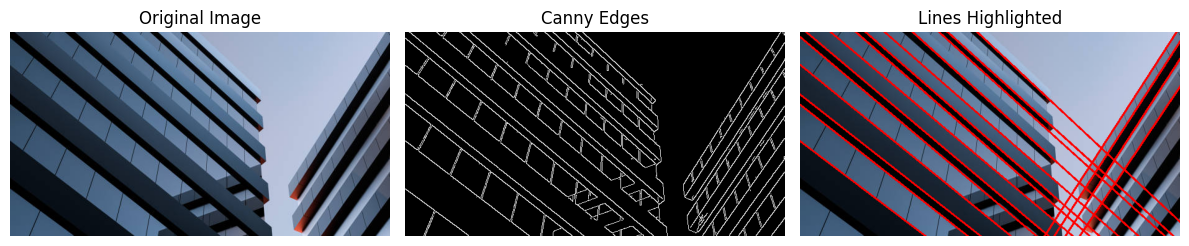

In [ ]:
def detect_and_highlight_lines(image_path, threshold=180):
    original_img = cv2.imread(image_path)

    gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * a)

            cv2.line(original_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return original_img, edges

input_image_path = './images/building.jpg'
highlighted_image, edges = detect_and_highlight_lines(input_image_path)

if highlighted_image is not None:
    original_img = cv2.imread(input_image_path)

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Canny Edges')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Lines Highlighted')
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()


### Threshold values effect

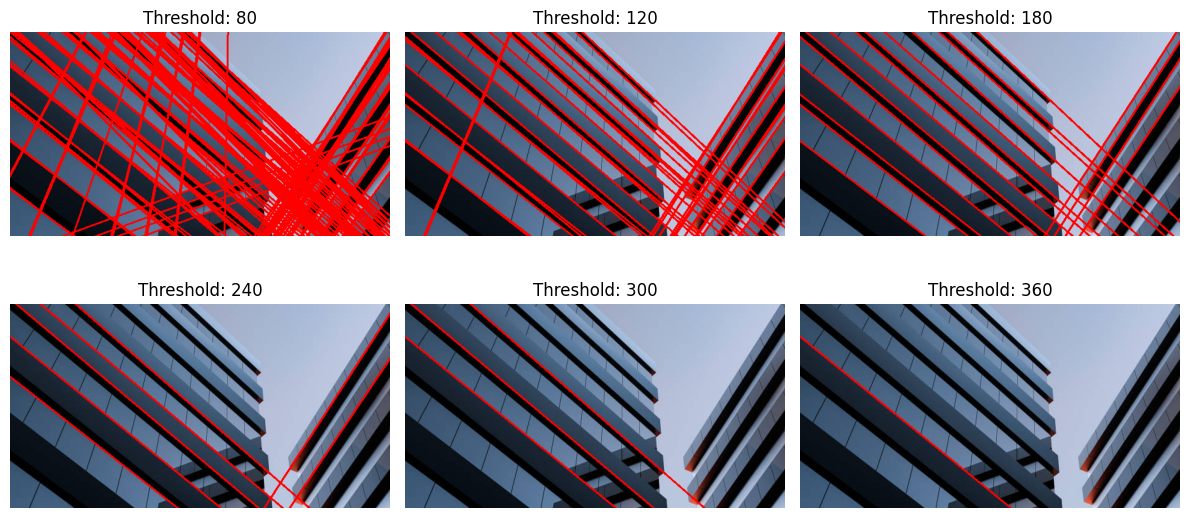

In [29]:
threshold_values = [80, 120, 180, 240, 300, 360]

plt.figure(figsize=(12, 6))
for i, threshold in enumerate(threshold_values):
    highlighted_image, _ = detect_and_highlight_lines(input_image_path, threshold)

    plt.subplot(2, 3, i+1)
    plt.title(f'Threshold: {threshold}')
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()

### Observations

Threshold values here, signify the minimum number of points n the Hough accumulator array required to consider it a valid line. \
For lower threshold values, more lines are detected, including weak or insignificant ones. This reults in cluttered output. \
On increasing threshold values, the number of lines detected decreases and false positives reduces. Thus when threshold = 360, only 1 line is detected. \

# 3

In [122]:
def display_images_grid(images, grid_size, titles=None, figsize=(12, 8)):

    n, m = grid_size
    num_images = len(images)
    
    if num_images > n * m:
        print("Error: More images than grid slots!")
        return
    
    plt.figure(figsize=figsize)
    
    for i, img in enumerate(images):
        plt.subplot(n, m, i + 1)
        if titles and i < len(titles):
            plt.title(titles[i])
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [123]:
def detect_and_highlight_circles(original_img, dp=1.2, min_dist=50, param1=100, param2=30, min_radius=0, max_radius=0):

    gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(
        blurred,
        # gray, 
        cv2.HOUGH_GRADIENT, 
        dp=dp, 
        minDist=min_dist,
        param1=param1, 
        param2=param2, 
        minRadius=min_radius, 
        maxRadius=max_radius
    )

    output_img = original_img.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            x, y, radius = circle
            cv2.circle(output_img, (x, y), radius, (255, 255, 255), 2)
            cv2.circle(output_img, (x, y), 1, (0, 0, 255), 2)

    return output_img, circles

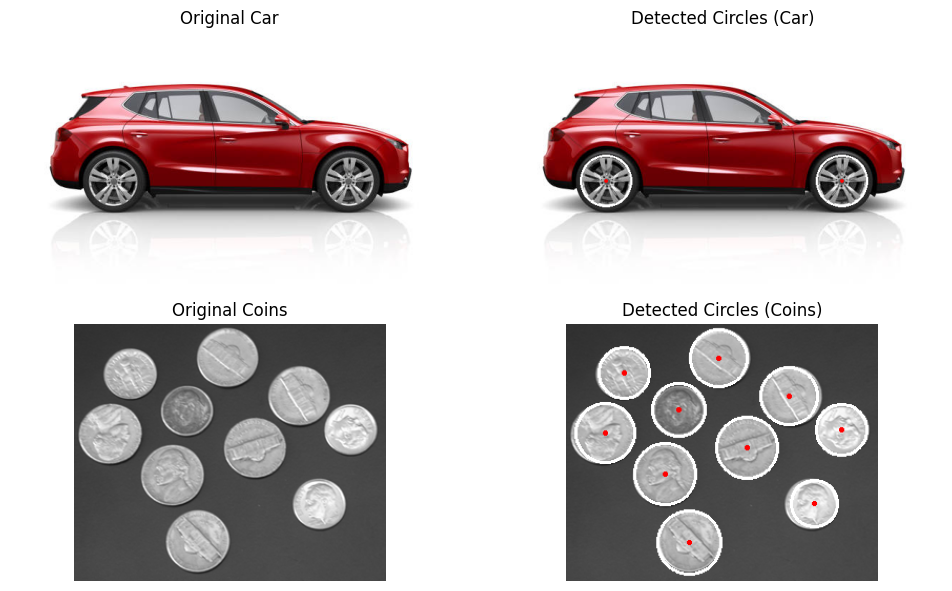

In [124]:
car_img = cv2.imread('./images/car.jpg')
coins_img = cv2.imread('./images/coins.png')

detected_image_car, detected_circles_car = detect_and_highlight_circles(car_img,dp=2,param2=100,max_radius=60)
detected_image, detected_circles = detect_and_highlight_circles(coins_img)

car_img = cv2.imread('./images/car.jpg')
coins_img = cv2.imread('./images/coins.png')

images = [car_img, detected_image_car, coins_img, detected_image]
titles = ['Original Car', 'Detected Circles (Car)', 'Original Coins', 'Detected Circles (Coins)']
display_images_grid(images, grid_size=(2, 2), titles=titles, figsize=(10, 6))

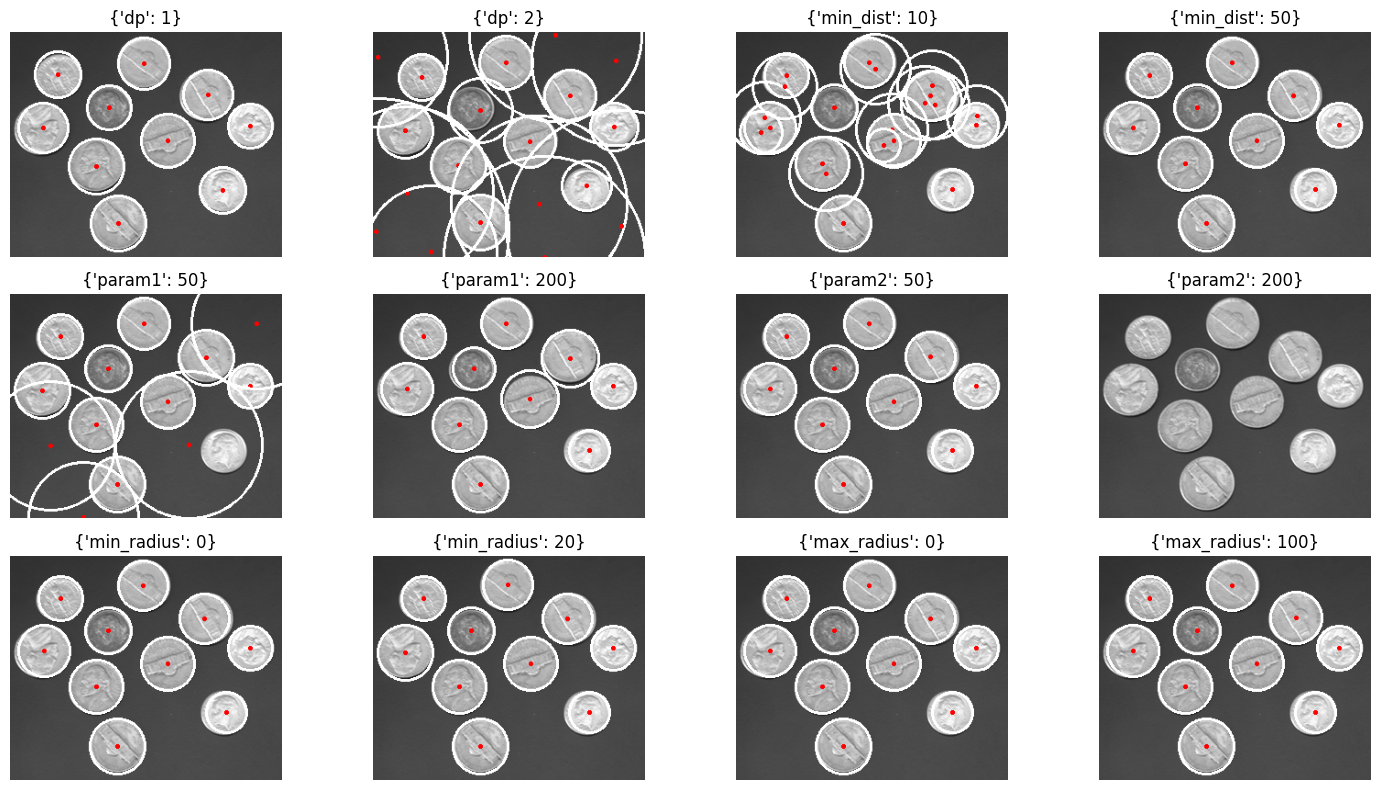

In [128]:
parameter_sets = [
    {'dp': 1},
    {'dp': 2},
    {'min_dist': 10},
    {'min_dist': 50},
    {'param1': 50},
    {'param1': 200},
    {'param2': 50},
    {'param2': 200},
    {'min_radius': 0},
    {'min_radius': 20},
    {'max_radius': 0},
    {'max_radius': 100}
]

plt.figure(figsize=(15, 8))

for i, params in enumerate(parameter_sets):
    detected_image, detected_circles = detect_and_highlight_circles(coins_img, **params)

    plt.subplot(3, 4, i + 1)
    plt.title(params)
    plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [131]:
def detect_and_mark_corners(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01):
    original_img = cv2.imread(image_path)
    gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    corners = cv2.cornerHarris(gray, block_size, ksize, k)
    corners = cv2.dilate(corners, None)

    marked_img = original_img.copy()
    marked_img[corners > threshold * corners.max()] = [0, 0, 255]

    return original_img, marked_img

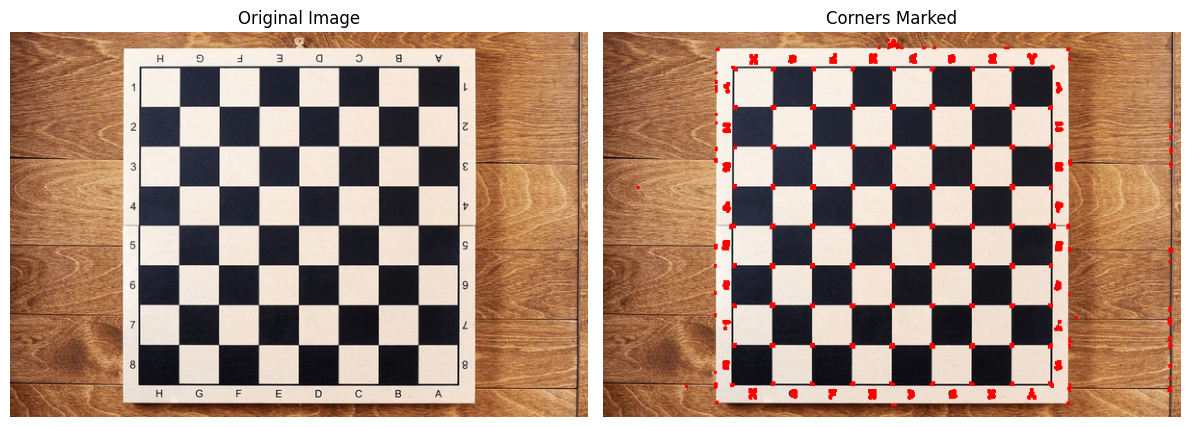

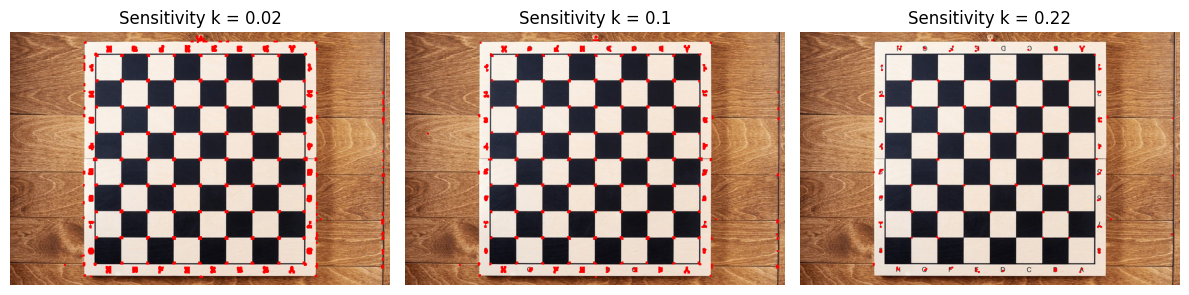

In [152]:
input_image_path = './images/chessboard.webp'
original_img, marked_img = detect_and_mark_corners(input_image_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Corners Marked')
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

sensitivity_values = [0.02, 0.1, 0.22]

plt.figure(figsize=(12, 6))
for i, k in enumerate(sensitivity_values):
    _, marked_img = detect_and_mark_corners(input_image_path, k=k)
    plt.subplot(1, len(sensitivity_values), i + 1)
    plt.title(f'Sensitivity k = {k}')
    plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()